# Moon dataset
Lets study how traditional ML algorithm fare with ANN on moon dataset.
- Change the noise to 0.1, 0.2,0.3,0.4

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap

# 1. Generate dataset
X, y = make_moons(n_samples=500,
                  noise=0.1, # this controls the seperation
                  random_state=42)
print(X[:5])
print(y[:5])

[[ 0.83067643 -0.40993581]
 [ 0.79835529  0.83761218]
 [ 1.05046846 -0.48516193]
 [-0.25814276  0.98000844]
 [ 0.3306816   1.14763307]]
[1 0 1 0 0]


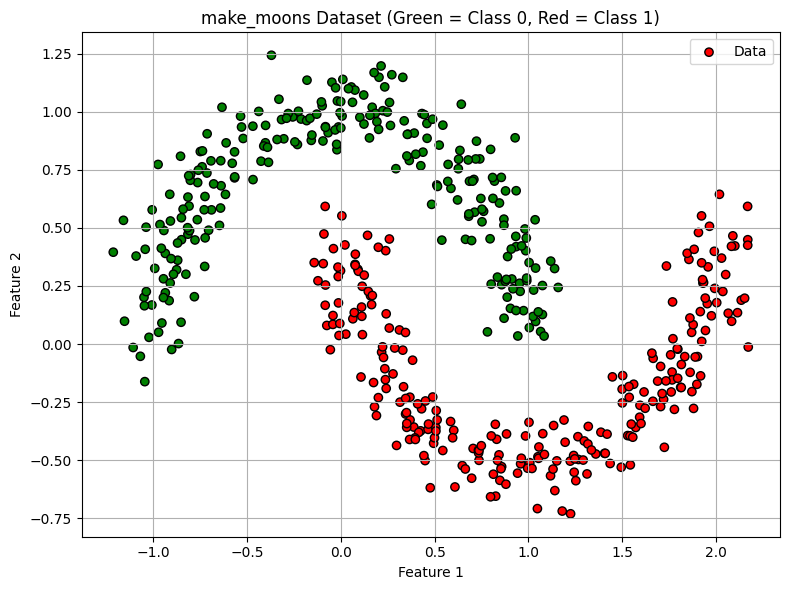

In [9]:
# Map y to colors: 0 → green, 1 → red
colors = ['green' if label == 0 else 'red' for label in y]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', marker='o', label='Data')

plt.title("make_moons Dataset (Green = Class 0, Red = Class 1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1) Traditional ML models

In [10]:


# 2. Define classifiers
models = {
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 3. Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))




=== SVM (RBF Kernel) ===
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


=== KNN ===
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


=== Decision Tree ===
Accuracy: 99.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.99      0.99       

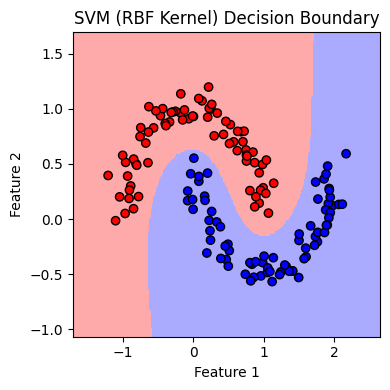

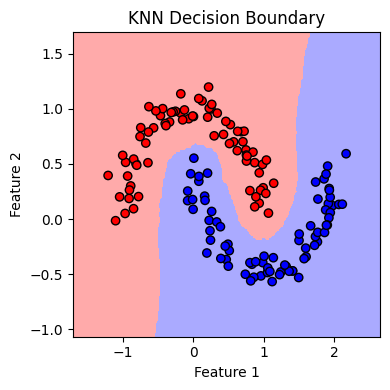

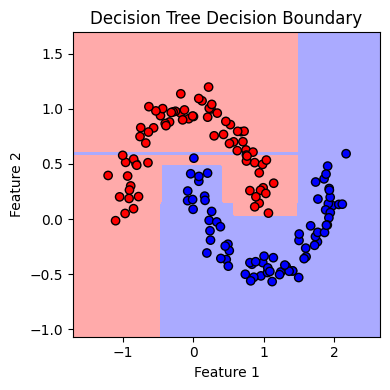

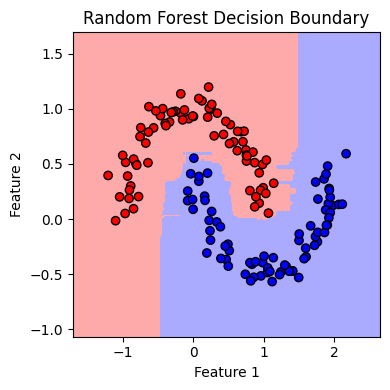

In [13]:
# 4. Decision boundary plotting
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(4, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()

# 5. Visualize decision boundaries
for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"{name} Decision Boundary")


# 2) Using Neural Network

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 0.89


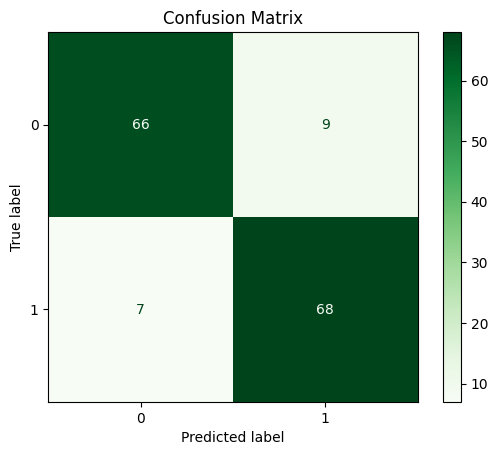

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


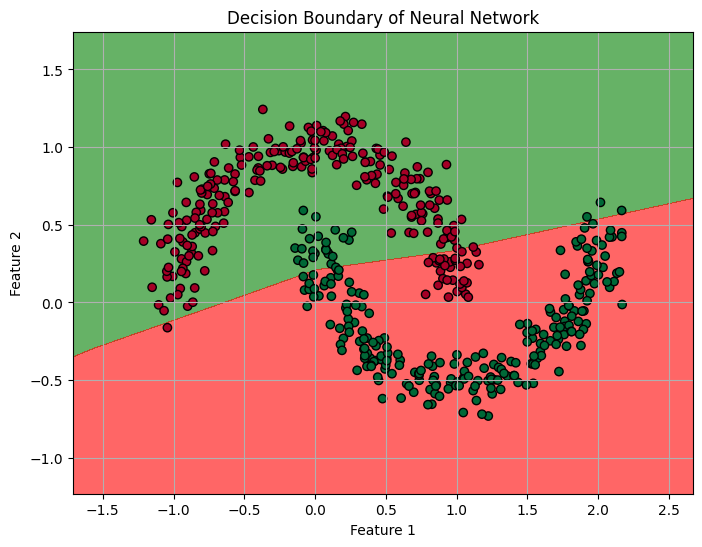

In [14]:
# Took 1 minutes

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# 3. Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build a simple neural network (1 hidden layer for non-linearity)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # output layer
])

# 5. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the model
model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

# 7. Predict
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

# 8. Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 10. Visualize decision boundary
def plot_decision_boundary(model, X, y, scaler):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    probs = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, colors=['green', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn', edgecolor='k')
    plt.title("Decision Boundary of Neural Network")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X, y, scaler)


In [15]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

None


## observation
For dense layer: 
```
num of parameter 
= total_num_of_wts + total_num_of_bias
= (2*10) + 10 
= 30
```

For dense_1:
```
num_of_para
= total_num_of_wts + total_num_bias
= 10 + 1
= 11
```

## 3) Let add more layers

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 1.00


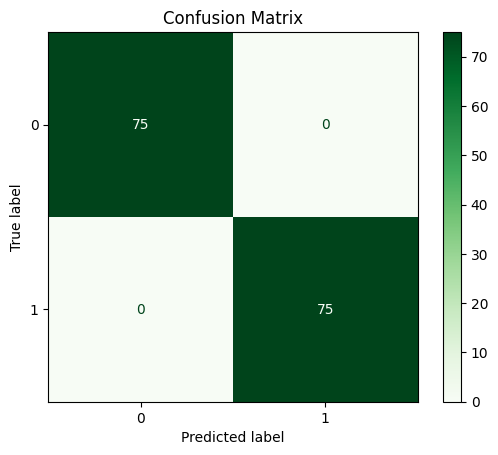

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


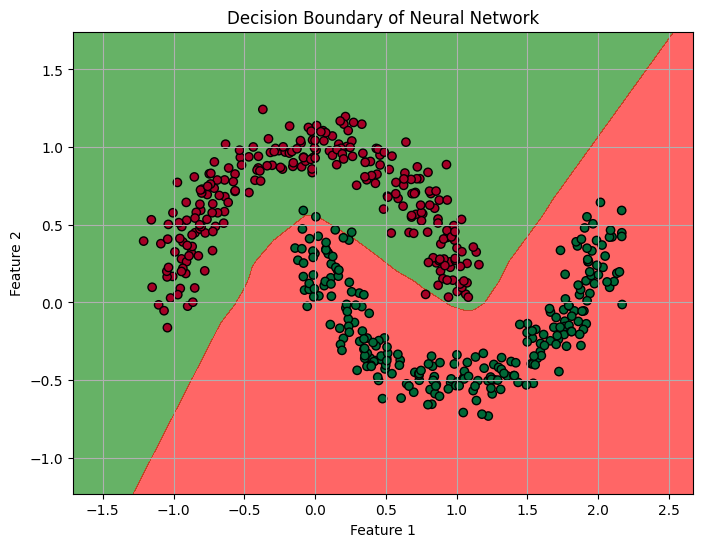

In [17]:
# took 1 minute on CPU

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# 3. Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build a simple neural network (1 hidden layer for non-linearity)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),  # second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 5. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the model
model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

# 7. Predict
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

# 8. Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 10. Visualize decision boundary
def plot_decision_boundary(model, X, y, scaler):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    probs = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.6, colors=['green', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn', edgecolor='k')
    plt.title("Decision Boundary of Neural Network")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(model, X, y, scaler)
